## Abgabe SMD A Blatt 01
von Celina Kortmann, Felix Göke und

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Blatt 1
## Exercise 1 - Numerical Stability

Betrachten Sie die Funktionen
(a) $f(x)=(x^3+1/3)-(x^3-1/3)$  
(b) $g(x)=((3+x^3/3)-(3-x^3/3))/x^3$ .  
Determine empirically for which ranges of $x$ (roughly) the numerical result 
* deviates from the algebraic by more than 1%,
* is equal to zero 

The algebraic result is:
$f(x)=g(x)=\frac{2}{3}$

In [20]:
f = lambda x: (x**3+1/3)-(x**3-1/3) #kurze anonyme funktion
g = lambda x: ((3+x**3/3)-(3-x**3/3))/x**3
exact = 2/3

x_size=10000
x_a, f_x, err_f = {},{},{} #arrays um ergebnisse zu speichern
x_a['default'] = np.logspace(4,6,x_size) #erzeugt ein Array mit 10.000 Werten im Bereich von 10^4 bis 10^6 im Standard Datentyp
x_a['32'] = np.logspace(1, 3, x_size, dtype='float32') 
x_a['64'] = np.logspace(4, 6, x_size, dtype='float64')

for key in x_a: f_x[key]=f(x_a[key]) #wendet f() auf das Array an und speichert es in f_x
for key in x_a: err_f[key]=np.abs(exact-f_x[key])/exact # Berechnet die relative Abweichung vom exakten Ergebnis

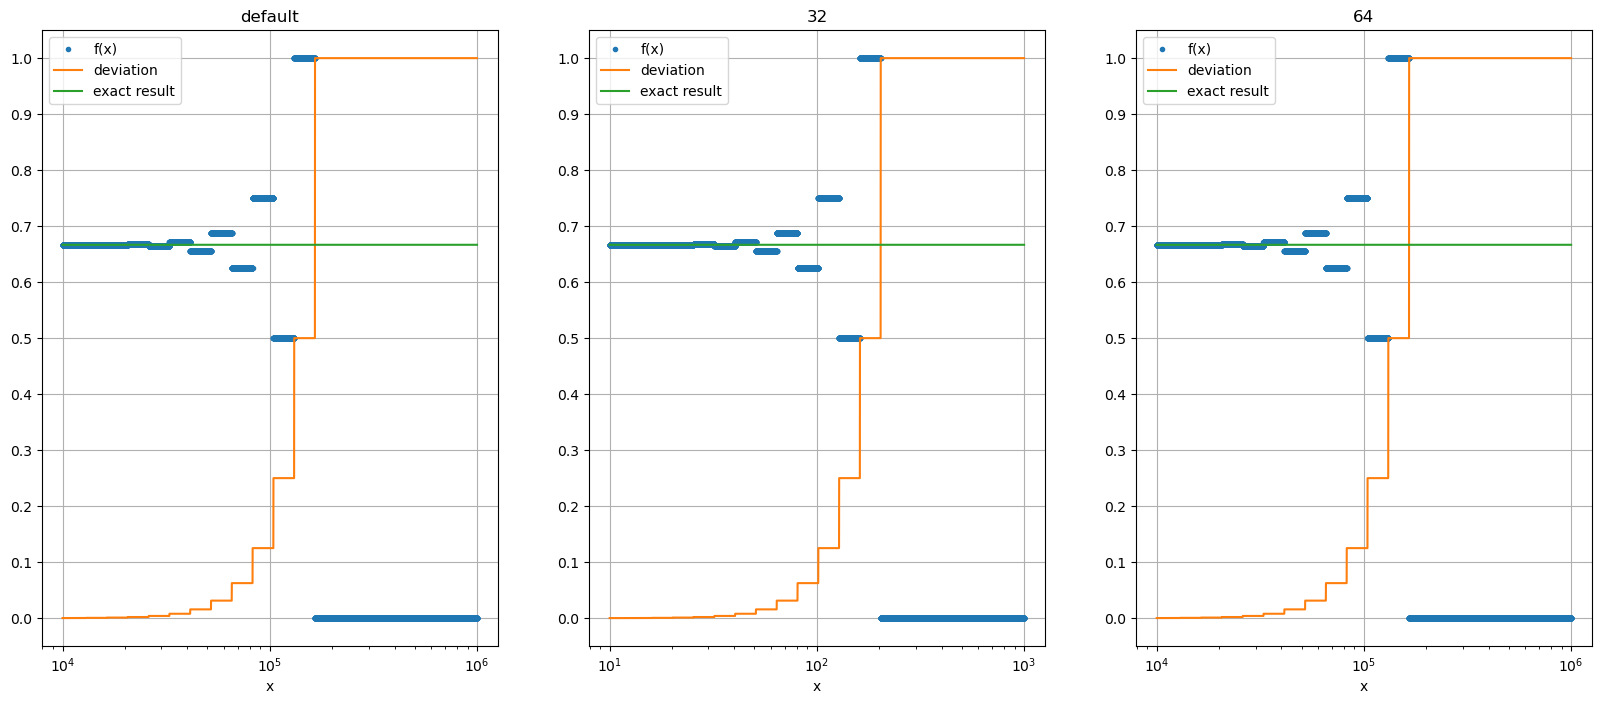

In [21]:
plt.subplots(1,3,figsize=(20,8))

i=1
for key in x_a:
    plt.subplot(1,3,i)
    plt.xscale('log')
    plt.yticks(np.arange(0.0,1.1,0.1))
    plt.xlabel('x')
    plt.title(key)

    plt.plot(x_a[key],f_x[key],'.',label='f(x)')
    plt.plot(x_a[key], err_f[key],'-', label='deviation')
    plt.plot(x_a[key],np.full_like(x_a[key], exact),'-', label='exact result')

    plt.grid(which='major')
    plt.legend()
    i += 1

In [26]:
for key in x_a:
    print(f'precision for: {key}')
    print(f'    last x with a deviate under 1%: x={x_a[key][err_f[key]<0.01][-1]:.3f}')
    print(f'    first x for f(x)=0: x={x_a[key][f_x[key]==0][0]:.3f}')

precision for: default
    last x with a deviate under 1%: x=41272.575
    first x for f(x)=0: x=165166.434
precision for: 32
    last x with a deviate under 1%: x=50.777
    first x for f(x)=0: x=203.203
precision for: 64
    last x with a deviate under 1%: x=41272.575
    first x for f(x)=0: x=165166.434
